In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
csv_file = "C:/Users/ramya/Documents/Master Final Project/Phase 2/Project/sentiment.csv"
df = pd.read_csv(csv_file)
df.shape

(217231, 24)

In [4]:
df.head(5)

,tweet_id,post_text,parent_id,parent_user,create_date,tweet_length,emoticon_x,mention_count_x,hashtag_count_x,like_count,...,following_count,history_tweets,account_age,hashtag_count_y,mention_count_y,description_length,emoticon_y,processed_tweet,sentiment,group
0,1260590991641362436,So you left a 69 page guidebook but no PPE or ...,0,0,2020-05-13T15:21:27.000Z,278,0,0,0,301,...,1017.0,6,12.0,0,1,140,1,so you left a 69 page guidebook but no ppe or ...,Positive,0
1,1257296415849697280,How people act when they get a little bit of p...,1256955387066101760,111921,2020-05-04T13:09:59.000Z,139,0,0,1,19,...,1017.0,6,12.0,0,1,140,1,how people act when they get a little bit of p...,Positive,0
2,1288771853822103552,More tales from the NHS frontline are emerging...,0,0,2020-07-30T09:42:08.000Z,301,0,1,0,194,...,2835.0,5,12.0,0,1,158,0,more tales from the nhs frontline are emerging...,Negative,1
3,1251209120528637952,DEVELOPING: A crowd of protesters could be see...,0,0,2020-04-17T18:01:15.000Z,302,0,1,0,7650,...,7014.0,138,16.0,0,0,156,0,developing a crowd of protesters could be seen...,Negative,1
4,1339567071588442113,"Latest we expect on checks, *as of now*, per a...",0,0,2020-12-17T13:44:12.000Z,276,0,0,0,621,...,1405.0,100,12.0,0,2,156,0,latest we expect on checks as of now per aides...,Negative,0


In [5]:
df.drop(['tweet_id','tweet_user','parent_user','parent_id','create_date','post_text', 'processed_tweet'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217231 entries, 0 to 217230
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tweet_length        217231 non-null  int64  
 1   emoticon_x          217231 non-null  int64  
 2   mention_count_x     217231 non-null  int64  
 3   hashtag_count_x     217231 non-null  int64  
 4   like_count          217231 non-null  int64  
 5   retweet_count       217231 non-null  int64  
 6   questionmark_count  217231 non-null  int64  
 7   follower_count      217231 non-null  float64
 8   following_count     217231 non-null  float64
 9   history_tweets      217231 non-null  int64  
 10  account_age         217231 non-null  float64
 11  hashtag_count_y     217231 non-null  int64  
 12  mention_count_y     217231 non-null  int64  
 13  description_length  217231 non-null  int64  
 14  emoticon_y          217231 non-null  int64  
 15  sentiment           217231 non-nul

In [7]:
df['follower_count'] = df['follower_count'].astype(int)
df['following_count'] = df['following_count'].astype(int)
df['account_age'] = df['account_age'].astype(int)

In [8]:
label_sentiment = {"Negative":0,"Positive":1}
def label_decode(label):
  return label_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decode(x))

In [9]:
df.head(5)

,tweet_length,emoticon_x,mention_count_x,hashtag_count_x,like_count,retweet_count,questionmark_count,follower_count,following_count,history_tweets,account_age,hashtag_count_y,mention_count_y,description_length,emoticon_y,sentiment,group
0,278,0,0,0,301,113,0,28000,1017,6,12,0,1,140,1,1,0
1,139,0,0,1,19,8,0,28000,1017,6,12,0,1,140,1,1,0
2,301,0,1,0,194,99,0,73909,2835,5,12,0,1,158,0,0,1
3,302,0,1,0,7650,4279,0,234555,7014,138,16,0,0,156,0,0,1
4,276,0,0,0,621,231,0,98474,1405,100,12,0,2,156,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217231 entries, 0 to 217230
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   tweet_length        217231 non-null  int64
 1   emoticon_x          217231 non-null  int64
 2   mention_count_x     217231 non-null  int64
 3   hashtag_count_x     217231 non-null  int64
 4   like_count          217231 non-null  int64
 5   retweet_count       217231 non-null  int64
 6   questionmark_count  217231 non-null  int64
 7   follower_count      217231 non-null  int32
 8   following_count     217231 non-null  int32
 9   history_tweets      217231 non-null  int64
 10  account_age         217231 non-null  int32
 11  hashtag_count_y     217231 non-null  int64
 12  mention_count_y     217231 non-null  int64
 13  description_length  217231 non-null  int64
 14  emoticon_y          217231 non-null  int64
 15  sentiment           217231 non-null  int64
 16  group               

In [11]:
df.corr()

,tweet_length,emoticon_x,mention_count_x,hashtag_count_x,like_count,retweet_count,questionmark_count,follower_count,following_count,history_tweets,account_age,hashtag_count_y,mention_count_y,description_length,emoticon_y,sentiment,group
tweet_length,1.000000,-0.044012,0.296751,0.185393,0.022083,0.025826,0.130599,0.034229,0.050622,0.025074,0.018860,0.016891,0.039164,0.115345,-0.013745,-0.314981,0.030171
emoticon_x,-0.044012,1.000000,0.011966,0.011077,-0.010900,-0.010356,-0.018486,-0.014565,0.021206,-0.013012,-0.052302,0.054493,0.005569,0.020808,0.162617,0.073261,-0.017271
mention_count_x,0.296751,0.011966,1.000000,0.040637,-0.002581,-0.001935,0.001647,-0.002099,0.003414,-0.001292,-0.013432,0.025150,0.000813,0.015418,0.010799,0.020424,0.001289
hashtag_count_x,0.185393,0.011077,0.040637,1.000000,-0.008367,-0.007671,-0.008523,-0.010680,0.022819,-0.009747,-0.005234,0.118050,-0.011173,0.051634,0.042442,0.018153,0.008732
like_count,0.022083,-0.010900,-0.002581,-0.008367,1.000000,0.962941,-0.003808,0.561566,0.057567,0.507328,0.041360,-0.014763,0.006624,-0.010535,0.026323,-0.006955,-0.001472
retweet_count,0.025826,-0.010356,-0.001935,-0.007671,0.962941,1.000000,-0.002894,0.525639,0.055035,0.480056,0.039623,-0.014467,0.008917,-0.007851,0.025130,-0.009793,-0.001629
questionmark_count,0.130599,-0.018486,0.001647,-0.008523,-0.003808,-0.002894,1.000000,-0.009555,0.011722,-0.007171,-0.003642,0.007743,-0.006472,0.009195,0.006648,-0.078684,0.006821
follower_count,0.034229,-0.014565,-0.002099,-0.010680,0.561566,0.525639,-0.009555,1.000000,0.050383,0.932113,0.063541,-0.018077,0.002746,-0.018663,0.053848,-0.009597,0.001071
following_count,0.050622,0.021206,0.003414,0.022819,0.057567,0.055035,0.011722,0.050383,1.000000,-0.006990,0.055881,0.179292,0.057891,0.170246,0.102901,-0.011419,-0.001504
history_tweets,0.025074,-0.013012,-0.001292,-0.009747,0.507328,0.480056,-0.007171,0.932113,-0.006990,1.000000,0.051005,-0.016524,-0.003590,-0.023587,0.063723,-0.007369,-0.001663


In [12]:
target_counts = df['group'].value_counts()
print("Target Value Counts:")
print(target_counts)

Target Value Counts:
0    177818
1     39413
Name: group, dtype: int64


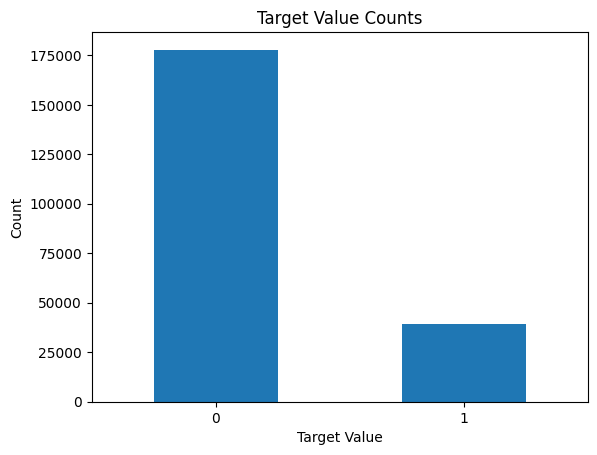

In [13]:
target_counts = df['group'].value_counts()
target_counts.plot(kind='bar')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Target Value Counts')
plt.xticks(rotation=0)
plt.show()

In [14]:
X = df.drop(columns=['group']).values
y = df['group'].values

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
oversampler = RandomOverSampler(random_state=42)
X_balanced, y_balanced = oversampler.fit_resample(X_scaled, y)
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_balanced.shape[1],)),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_balanced, y_balanced, epochs=20, batch_size=32)



Epoch 1/20


11114/11114 [==============================] - 25s 2ms/step - loss: 0.6916 - accuracy: 0.5238
Epoch 2/20
11114/11114 [==============================] - 23s 2ms/step - loss: 0.6909 - accuracy: 0.5265
Epoch 3/20
11114/11114 [==============================] - 23s 2ms/step - loss: 0.6904 - accuracy: 0.5285
Epoch 4/20
11114/11114 [==============================] - 23s 2ms/step - loss: 0.6900 - accuracy: 0.5304
Epoch 5/20
11114/11114 [==============================] - 23s 2ms/step - loss: 0.6894 - accuracy: 0.5314
Epoch 6/20
11114/11114 [==============================] - 24s 2ms/step - loss: 0.6886 - accuracy: 0.5344
Epoch 7/20
11114/11114 [==============================] - 24s 2ms/step - loss: 0.6876 - accuracy: 0.5378
Epoch 8/20
11114/11114 [==============================] - 25s 2ms/step - loss: 0.6866 - accuracy: 0.5401
Epoch 9/20
11114/11114 [==============================] - 22s 2ms/step - loss: 0.6857 - accuracy: 0.5426
Epoch 10/20
11114/11114 [==========================

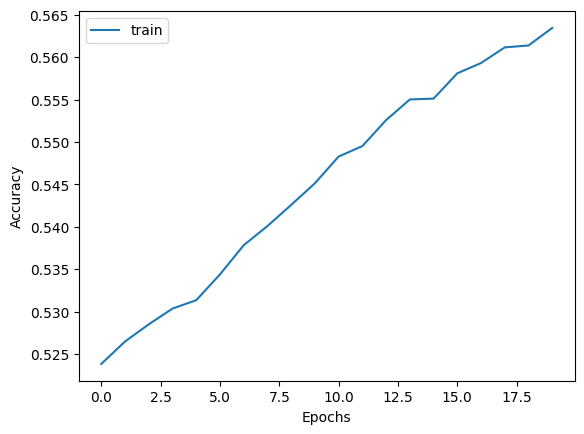

In [17]:
plt.plot(history.history['accuracy'], label='train')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

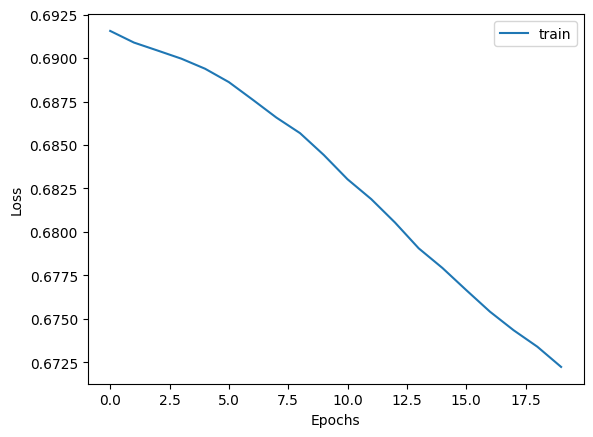

In [18]:
plt.plot(history.history['loss'], label='train')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
new_data = np.array([[301,0,1,0,194,99,1,73909,2835,5,11,0,1,158,0,0]])
new_data_scaled = scaler.transform(new_data)
predictions = model.predict(new_data_scaled)
predicted_class = round(predictions[0][0])
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 152ms/step
Predicted Class: 1


In [20]:
model.save("C:/Users/ramya/Documents/Master Final Project/Phase 2/Project/model.h5")

C:\Users\ramya\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
# X1 = df.drop(columns=['group']).values
# y1 = df['group'].values
# X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
# scaler1 = StandardScaler()
# X_train_scaled1 = scaler1.fit_transform(X_train)
# X_test_scaled1 = scaler1.transform(X_test)
# oversampler1 = RandomOverSampler(random_state=42)
# X_train_balanced1, y_train_balanced1 = oversampler1.fit_resample(X_train_scaled1, y_train)

In [22]:
# model1 = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train_balanced1.shape[1],)),
#     Dropout(0.5),
#     Dense(32, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])
# model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model1.fit(X_train_balanced1,  y_train_balanced1, epochs=10, batch_size=32, validation_split=0.2)
# loss, accuracy = model1.evaluate(X_test_scaled1, y_test)
# print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

In [23]:
# new_data1 = np.array([[278,0,0,0,301,113,1,28000,1017,6,12,0,1,140,1,1]])
# new_data_scaled1 = scaler.transform(new_data1)
# predictions1 = model1.predict(new_data_scaled1)
# predicted_class1 = round(predictions1[0][0])
# print("Predicted Class:", predicted_class1)

In [24]:
# model1.save("C:/Users/ramya/Documents/Master Final Project/Phase 2/Project/model1.h5")

In [25]:
data_df_path = "C:/Users/ramya/Documents/Master Final Project/Phase 2/Project/processeddata.csv"
data_df = pd.read_csv(data_df_path)
data_df.head()

,likes,retweets,following,followers,history_tweets,tweet_length,tweet_hashtag,tweet_mention,tweet_questionmark,tweet_emoji,bio_length,bio_hashtag,bio_mention,bio_emoji,account_age,sentiment
0,3899,623,151,867147,6485,66,1,0,0,0,53,0,0,0,10,1


In [26]:
desired_order = [
    'tweet_length',
    'tweet_emoji',
    'tweet_mention',
    'tweet_hashtag',
    'likes',
    'retweets',
    'tweet_questionmark',
    'followers',
    'following',
    'history_tweets',
    'account_age',
    'bio_hashtag',
    'bio_mention',
    'bio_length',
    'bio_emoji',
    'sentiment'
]
data_df = data_df.loc[:, desired_order]

In [27]:
data_df.head()

,tweet_length,tweet_emoji,tweet_mention,tweet_hashtag,likes,retweets,tweet_questionmark,followers,following,history_tweets,account_age,bio_hashtag,bio_mention,bio_length,bio_emoji,sentiment
0,66,0,0,1,3899,623,0,867147,151,6485,10,0,0,53,0,1


In [28]:
datapath = "C:/Users/ramya/Documents/Master Final Project/Phase 2/Project/processeddata.csv"
data_df.to_csv(datapath, index=False)